# New Section

In [4]:
from google.colab import files
uploaded=files.upload()

Saving sales_data.csv to sales_data.csv


In [5]:
!ls

sales_data.csv	sample_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

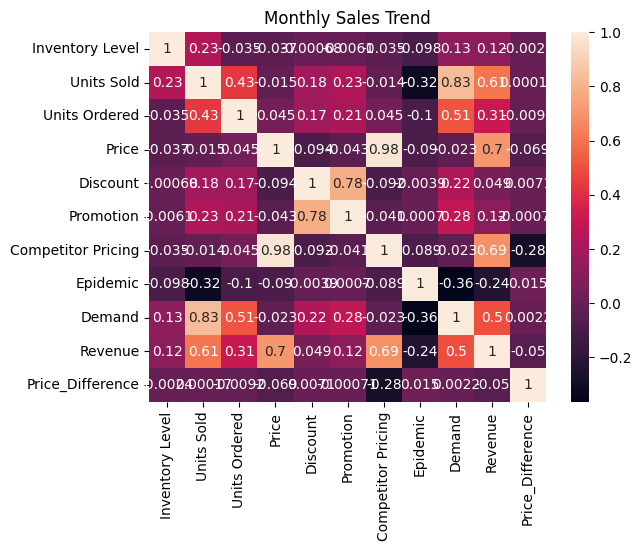

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sales_data.csv")
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df['Revenue'] = df['Price'] * df['Units Sold']
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Price_Difference'] = df['Price'] - df['Competitor Pricing']
df.groupby('Month')['Units Sold'].sum().plot()
plt.title("Monthly Sales Trend")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
df_encoded = pd.get_dummies(df, drop_first=True)
y = df_encoded['Demand']
X = df_encoded.drop(['Demand', 'Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (60800, 50)
Testing shape: (15200, 50)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 12.055328947368421
R2 Score: 0.87270388274811


In [9]:
X_simulated = X_test.copy()
X_simulated['Price'] = X_simulated['Price'] * 1.05
new_demand = model.predict(X_simulated)
comparison = pd.DataFrame({
    "Original Demand": y_test.values,
    "Predicted Demand": y_pred,
    "New Demand (5% Price Increase)": new_demand
})

comparison.head()


,Original Demand,Predicted Demand,New Demand (5% Price Increase)
0,123,115.66,115.85
1,184,188.37,188.52
2,114,105.27,105.27
3,96,82.57,82.57
4,42,45.21,45.18


In [10]:
X_simulated_big = X_test.copy()
X_simulated_big['Price'] = X_simulated_big['Price'] * 1.20

new_demand_big = model.predict(X_simulated_big)

comparison_big = pd.DataFrame({
    "Predicted Demand": y_pred,
    "New Demand (20% Price Increase)": new_demand_big
})

comparison_big.head()


,Predicted Demand,New Demand (20% Price Increase)
0,115.66,116.13
1,188.37,188.63
2,105.27,105.27
3,82.57,83.69
4,45.21,45.31


In [11]:
import pandas as pd
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10)


,0
Units Sold,0.715073
Units Ordered,0.078190
Inventory Level,0.067329
Price_Difference,0.012993
Price,0.011869
Day,0.010783
Competitor Pricing,0.010638
Revenue,0.010219
Category_Furniture,0.008144
Epidemic,0.007642


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df_encoded = pd.get_dummies(df, drop_first=True)

y = df_encoded['Demand']

X = df_encoded.drop(['Demand', 'Date', 'Units Sold', 'Revenue'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



MAE: 12.067901315789472
R2 Score: 0.8456233639762729


In [15]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10)


,0
Units Ordered,0.331131
Price,0.103523
Epidemic,0.099852
Category_Groceries,0.060859
Category_Furniture,0.048964
Inventory Level,0.043730
Competitor Pricing,0.034821
Promotion,0.034620
Price_Difference,0.021282
Category_Toys,0.020836


In [16]:

X_base = X_test.copy()


base_demand = model.predict(X_base)
base_revenue = (X_base['Price'] * base_demand).sum()


X_up = X_base.copy()
X_up['Price'] = X_up['Price'] * 1.05
demand_up = model.predict(X_up)
revenue_up = (X_up['Price'] * demand_up).sum()

X_down = X_base.copy()
X_down['Price'] = X_down['Price'] * 0.95
demand_down = model.predict(X_down)
revenue_down = (X_down['Price'] * demand_down).sum()

print("Original Revenue:", base_revenue)
print("Revenue after 5% Increase:", revenue_up)
print("Revenue after 5% Decrease:", revenue_down)


Original Revenue: 102654116.7454
Revenue after 5% Increase: 113378844.06114
Revenue after 5% Decrease: 92576212.848705
